In [41]:
%matplotlib inline
%config InlineBackend.figure_formats = ['svg']

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Audio
import librosa
import librosa.display
from scipy.signal import butter, filtfilt

In [43]:
audio1, freq = librosa.load(r"C:\Users\taian\UFSC\LVA\teste2.waptt.wav", sr=None)


In [44]:
Audio(data=audio1, rate=freq)

In [45]:
fft = np.fft.fft(audio1)
freqfft = np.fft.fftfreq(len(audio1), d=1/freq)
# calcula a fft do audio (dominio da frequencia)
baixas = fft.copy()
altas = fft.copy()

limiteBaixas = 10000
limiteAltas = 2000

baixas[np.abs(freqfft) > limiteBaixas] = 0
# zera as frequencias maiores do que o limite de passa baixas
altas[np.abs(freqfft) < limiteAltas] = 0
# zera as frequencias maiores do que o limite de passa altas
n = len(audio1) // 2
magnitude_lpf = np.abs(baixas[:n])
magnitude_hpf = np.abs(altas[:n])
# magnitude dos sinais (positivos) de cada filtro
fqfinal = freqfft[:n]

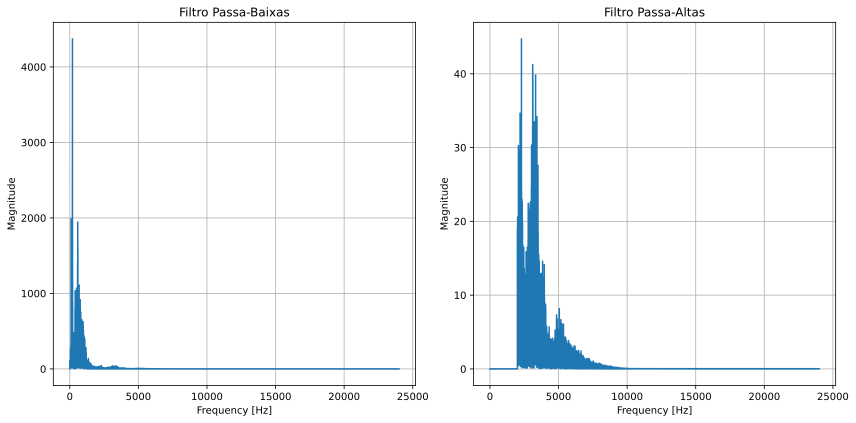

In [46]:
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.plot(fqfinal, magnitude_lpf)
plt.title("Filtro Passa-Baixas")
plt.xlabel("Frequency [Hz]")
plt.ylabel("Magnitude")
plt.grid()

plt.subplot(1,2,2)
plt.plot(fqfinal, magnitude_hpf)
plt.title("Filtro Passa-Altas")
plt.xlabel("Frequency [Hz]")
plt.ylabel("Magnitude")
plt.grid()

plt.tight_layout()
plt.show()

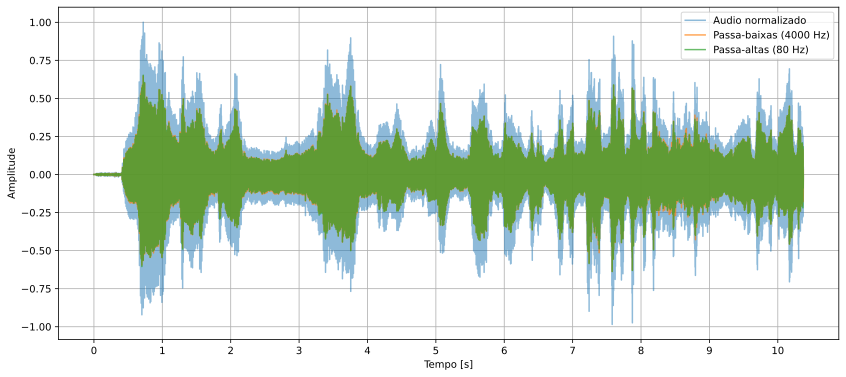

In [47]:
audioNorm = audio1 / np.max(np.abs(audio1))

tempo = np.linspace(0, len(audio1) / freq, num=len(audio1))


def butter_filter(data, cutoff, fs, btype, order=5):
    nyq = 0.5 * fs #frequencia de nyquist (maior frequencia a ser representada sem distorção ou sobreposição)
    normal_cutoff = cutoff / nyq 
    b, a = butter(order, normal_cutoff, btype=btype, analog=False)
    y = filtfilt(b, a, data)
    return y

cutoff_low = 4000   # Passa-baixas: permite frequências abaixo de 4000 Hz
cutoff_high = 80  # Passa-altas: permite frequências acima de 80 Hz

# a voz masculina vai de 85Hz a 180Hz e a feminina vai de 165Hz a 255Hz 
# altas: cortei abaixo de 80Hz para eliminar ruidos ambientes graves (ventiladores, transito, vibrações...) sem afetar a voz no audio
# baixas: cortei acima de 4000Hz para reduzir ruidos ambientes agudos (eletronicos, zumbidos, chiados, sibilantes...)

audio_low = butter_filter(audio1, cutoff_low, freq, btype='low')
audio_high = butter_filter(audio1, cutoff_high, freq, btype='high')

plt.figure(figsize=(14, 6))

plt.plot(tempo, audioNorm, label='Audio normalizado', alpha=0.5)

plt.plot(tempo, audio_low, label='Passa-baixas (4000 Hz)', alpha=0.7)

plt.plot(tempo, audio_high, label='Passa-altas (80 Hz)', alpha=0.7)


plt.xlabel("Tempo [s]")
plt.ylabel("Amplitude")
plt.legend()
plt.grid()

plt.xticks(np.arange(0, len(audio1)/freq, step=1))

plt.show()

In [48]:
Audio(data=audioNorm, rate=48000)

In [49]:
Audio(data=audio_low, rate=48000)

In [50]:
Audio(data=audio_high, rate=48000)